In [1]:
# Importação do Pandas
import pandas as pd

In [2]:
!python --version

Python 3.8.8


# Inicialização dos arquivos

* telecom_customer_churn

In [3]:
df = pd.read_csv('Arquivos/telecom_customer_churn.csv') # Criação de um dataframe a partir de um arquivo CSV

In [4]:
display(df)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [5]:
print("Quantidade padrão de colunas do display:",pd.options.display.max_columns)
pd.set_option('display.max_columns', None)
print("Quantidade alterada para:",pd.options.display.max_columns)

display(df)

Quantidade padrão de colunas do display: 20
Quantidade alterada para: None


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [6]:
df_populacao = pd.read_csv('Arquivos/telecom_zipcode_population.csv')
display(df_populacao)

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019
...,...,...
1666,96145,4002
1667,96146,942
1668,96148,678
1669,96150,33038


In [7]:
df = pd.merge(df, df_populacao,
              left_on=['Zip Code'],
              right_on=['Zip Code'],
              how='left') # Mesclando as duas tabelas com base na coluna 'Zip Code'

### Reordenando a posição da coluna 'Population' dentro do dataframe ###
colunas = df.columns.tolist()
colunas.insert(7, colunas.pop(colunas.index('Population')))
df = df[colunas]

In [8]:
# Verificando a cardinalidade dos dados
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Population                           1569
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                      

# Renomeando as colunas, traduzindo para o portugues

In [9]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Population', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [10]:
df = df.rename(columns={'Customer ID':'ID_cliente',
                        'Gender': 'Genero',
                        'Age': 'Idade',
                        'Married': 'Casado',
                        'Number of Dependents':'Qtd_dependentes',
                        'City': 'Cidade',
                        'Zip Code':'Codigo_postal',
                        'Population': 'Populacao',
                        'Number of Referrals':'Qtd_indicações',
                        'Tenure in Months':'Meses_na_base',
                        'Offer':'Ultima_oferta',
                        'Phone Service':'Servico_telefone',
                        'Avg Monthly Long Distance Charges':'Recarga_longa_distancia',
                        'Multiple Lines':'Multiplas_linhas',
                        'Internet Service':'Servico_internet',
                        'Internet Type':'Tipo_internet',
                        'Avg Monthly GB Download':'Media_mensal_download_GB',
                        'Online Security':'Servico_seguranca',
                        'Online Backup':'Servico_backup',
                        'Device Protection Plan':'Servico_protecao_dispositivo',
                        'Premium Tech Support':'Servico_suporte_preferencial',
                        'Streaming TV':'Servico_tv',
                        'Streaming Movies':'Servico_filmes',
                        'Streaming Music':'Servico_musica',
                        'Unlimited Data':'Servico_ilimitado_dados',
                        'Contract':'Tipo_contrato',
                        'Paperless Billing':'Faturamento_sem_papel',
                        'Payment Method':'Tipo_pagamento',
                        'Monthly Charge':'Cobranca_mensal',
                        'Total Charges':'Total_cobranca',
                        'Total Refunds':'Total_reembolsos',
                        'Total Extra Data Charges':'Qtd_dados_extras',
                        'Total Long Distance Charges':'Cobrancas_longa_distancia',
                        'Total Revenue':'Total_cobranca_geral',
                        'Customer Status':'Situacao_cliente',
                        'Churn Category':'Categoria_cancelamento',
                        'Churn Reason':'Motivo_cancelamento' }, inplace=False)

In [11]:
df = df.drop('ID_cliente', axis=1)

In [12]:
val_unicos = {}
colunas = df.columns.tolist()
itens_removidos = ['Qtd_dependentes',
                   'Qtd_indicações',
                   'Qtd_dados_extras',
                   'Media_mensal_download_GB',
                   'Idade','Meses_na_base',
                   'Total_reembolsos',
                   'Cidade',
                   'Populacao',
                   'Cobranca_mensal',
                   'Longitude',
                   'Latitude',
                   'Codigo_postal',
                   'Recarga_longa_distancia',
                   'Cobrancas_longa_distancia',
                   'Total_cobranca',
                   'Total_cobranca_geral']

for item in itens_removidos:
    colunas.remove(item)

for col in colunas:
    val_unicos[col] = pd.DataFrame(df[col].unique(), columns=[col])

for col, val_unicos in val_unicos.items():
    print(f"Valores únicos para a coluna '{col}':")
    print(val_unicos)
    print()

Valores únicos para a coluna 'Genero':
   Genero
0  Female
1    Male

Valores únicos para a coluna 'Casado':
  Casado
0    Yes
1     No

Valores únicos para a coluna 'Ultima_oferta':
  Ultima_oferta
0          None
1       Offer E
2       Offer D
3       Offer A
4       Offer B
5       Offer C

Valores únicos para a coluna 'Servico_telefone':
  Servico_telefone
0              Yes
1               No

Valores únicos para a coluna 'Multiplas_linhas':
  Multiplas_linhas
0               No
1              Yes
2              NaN

Valores únicos para a coluna 'Servico_internet':
  Servico_internet
0              Yes
1               No

Valores únicos para a coluna 'Tipo_internet':
  Tipo_internet
0         Cable
1   Fiber Optic
2           DSL
3           NaN

Valores únicos para a coluna 'Servico_seguranca':
  Servico_seguranca
0                No
1               Yes
2               NaN

Valores únicos para a coluna 'Servico_backup':
  Servico_backup
0            Yes
1             No
2       

In [13]:
print(colunas)

['Genero', 'Casado', 'Ultima_oferta', 'Servico_telefone', 'Multiplas_linhas', 'Servico_internet', 'Tipo_internet', 'Servico_seguranca', 'Servico_backup', 'Servico_protecao_dispositivo', 'Servico_suporte_preferencial', 'Servico_tv', 'Servico_filmes', 'Servico_musica', 'Servico_ilimitado_dados', 'Tipo_contrato', 'Faturamento_sem_papel', 'Tipo_pagamento', 'Situacao_cliente', 'Categoria_cancelamento', 'Motivo_cancelamento']


In [14]:
subst = {
    'Male': 'Masculino',
    'Female': 'Feminino',
    'Yes': 'Sim',
    'No': 'Não',
    'Offer A': 'Oferta A',
    'Offer B': 'Oferta B',
    'Offer C': 'Oferta C',
    'Offer D': 'Oferta D',
    'Offer E': 'Oferta E',
    'None': 'Nenhuma oferta',
    'Cable': 'Cabo',
    'Fiber Optic': 'Fibra óptica',
    'DSL': 'Cabo DSL',
    'One Year': 'Um ano',
    'Month-to-Month': 'Mensal',
    'Two Year': 'Dois anos',
    'Credit Card': 'Cartão de credito',
    'Bank Withdrawal': 'Transferência Bancária',
    'Mailed Check': 'Cheque enviado pelo correio',
    'Stayed': 'Continua cliente',
    'Churned': 'Cancelou',
    'Joined': 'Se tornou cliente',
    'Competitor': 'Concorrente',
    'Dissatisfaction': 'Insatisfação',
    'Other': 'Outros',
    'Price': 'Preço',
    'Attitude': 'Atitude',
    'Competitor had better devices': 'Concorrente possui dispositivos melhores',
    'Product dissatisfaction': 'Insatisfação com o produto',
    'Network reliability': 'Confiabilidade da rede',
    'Limited range of services': 'Gama limitada de serviços',
    'Competitor made better offer': 'Concorrente fez uma oferta melhor',
    "Don't know": 'Não sabe dizer',
    'Long distance charges': 'Tarifas de longa distancia',
    'Attitude of service provider': 'Atitude do provedor do serviço',
    'Attitude of support person': 'Atitude do suporte',
    'Competitor offered higher download speeds': 'Concorrente ofereceu maiores velocidades de download',
    'Competitor offered more data': 'Concorrente ofereceu mais limite de dados',
    'Lack of affordable download/upload speed': 'Falta de velocidade de download/upload por um valor acessível',
    'Deceased': 'Faleceu',
    'Moved': 'Mudou-se',
    'Service dissatisfaction': 'Insatisfação com o serviço',
    'Price too high': 'Preço muito alto',
    'Lack of self-service on Website': 'Falta de autoatendimento no site',
    'Poor expertise of online support': 'Experiencia ruim no suporte online',
    'Extra data charges': 'Tarifas extras de dados',
    'Poor expertise of phone support': 'Experiencia ruim no suporte por telefone',
}
df = df.replace(subst)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        7043 non-null   object 
 1   Idade                         7043 non-null   int64  
 2   Casado                        7043 non-null   object 
 3   Qtd_dependentes               7043 non-null   int64  
 4   Cidade                        7043 non-null   object 
 5   Codigo_postal                 7043 non-null   int64  
 6   Populacao                     7043 non-null   int64  
 7   Latitude                      7043 non-null   float64
 8   Longitude                     7043 non-null   float64
 9   Qtd_indicações                7043 non-null   int64  
 10  Meses_na_base                 7043 non-null   int64  
 11  Ultima_oferta                 7043 non-null   object 
 12  Servico_telefone              7043 non-null   object 
 13  Rec

In [16]:
display(df)

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,93225,4498,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,NaN,NaN
1,Masculino,46,Não,0,Glendale,91206,31297,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,NaN,NaN
2,Masculino,50,Não,0,Costa Mesa,92627,62069,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,94553,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,93010,42853,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Feminino,20,Não,0,La Mesa,91941,44652,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,NaN,NaN
7039,Masculino,40,Sim,0,Riverbank,95367,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
7040,Masculino,22,Não,0,Elk,95432,383,39.108252,-123.645121,0,2,Oferta E,Sim,18.62,Não,Sim,Cabo DSL,51.0,Não,Sim,Não,Não,Não,Não,Não,Sim,Mensal,Sim,Cartão de credito,50.30,92.75,0.00,0,37.24,129.99,Se tornou cliente,NaN,NaN
7041,Masculino,21,Sim,0,Solana Beach,92075,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,NaN,NaN


# Analise do dataframe

In [17]:
df.count()

Genero                          7043
Idade                           7043
Casado                          7043
Qtd_dependentes                 7043
Cidade                          7043
Codigo_postal                   7043
Populacao                       7043
Latitude                        7043
Longitude                       7043
Qtd_indicações                  7043
Meses_na_base                   7043
Ultima_oferta                   7043
Servico_telefone                7043
Recarga_longa_distancia         6361
Multiplas_linhas                6361
Servico_internet                7043
Tipo_internet                   5517
Media_mensal_download_GB        5517
Servico_seguranca               5517
Servico_backup                  5517
Servico_protecao_dispositivo    5517
Servico_suporte_preferencial    5517
Servico_tv                      5517
Servico_filmes                  5517
Servico_musica                  5517
Servico_ilimitado_dados         5517
Tipo_contrato                   7043
F

In [18]:
print(df.groupby(['Servico_telefone'])['Servico_telefone'].count())
print('---------------------------------------')
print(df.groupby(['Servico_internet'])['Servico_internet'].count())

Servico_telefone
Não     682
Sim    6361
Name: Servico_telefone, dtype: int64
---------------------------------------
Servico_internet
Não    1526
Sim    5517
Name: Servico_internet, dtype: int64


In [19]:
print(df[df['Servico_telefone']=='Não'].count().sort_values(ascending=True))

Multiplas_linhas                  0
Recarga_longa_distancia           0
Motivo_cancelamento             170
Categoria_cancelamento          170
Servico_suporte_preferencial    682
Servico_tv                      682
Servico_filmes                  682
Servico_musica                  682
Servico_ilimitado_dados         682
Tipo_contrato                   682
Faturamento_sem_papel           682
Cobranca_mensal                 682
Total_cobranca                  682
Total_reembolsos                682
Qtd_dados_extras                682
Cobrancas_longa_distancia       682
Total_cobranca_geral            682
Situacao_cliente                682
Tipo_pagamento                  682
Servico_protecao_dispositivo    682
Genero                          682
Media_mensal_download_GB        682
Idade                           682
Casado                          682
Qtd_dependentes                 682
Cidade                          682
Codigo_postal                   682
Populacao                   

In [20]:
print(df[df['Servico_internet']=='Não'].count().sort_values(ascending=True))

Servico_seguranca                  0
Servico_ilimitado_dados            0
Servico_musica                     0
Servico_filmes                     0
Servico_tv                         0
Servico_suporte_preferencial       0
Servico_protecao_dispositivo       0
Servico_backup                     0
Media_mensal_download_GB           0
Tipo_internet                      0
Categoria_cancelamento           113
Motivo_cancelamento              113
Servico_telefone                1526
Situacao_cliente                1526
Total_cobranca_geral            1526
Cobrancas_longa_distancia       1526
Qtd_dados_extras                1526
Total_reembolsos                1526
Total_cobranca                  1526
Cobranca_mensal                 1526
Tipo_pagamento                  1526
Faturamento_sem_papel           1526
Tipo_contrato                   1526
Idade                           1526
Casado                          1526
Qtd_dependentes                 1526
Cidade                          1526
C

In [21]:
df.loc[df['Recarga_longa_distancia'].isnull(),'Recarga_longa_distancia'] = 0
df.loc[df['Multiplas_linhas'].isnull(),'Multiplas_linhas'] = 'Não'

df.loc[df['Tipo_internet'].isnull(),'Tipo_internet'] = 'Não'
df.loc[df['Media_mensal_download_GB'].isnull(),'Media_mensal_download_GB'] = 0
df.loc[df['Servico_seguranca'].isnull(),'Servico_seguranca'] = 'Não'
df.loc[df['Servico_backup'].isnull(),'Servico_backup'] = 'Não'
df.loc[df['Servico_protecao_dispositivo'].isnull(),'Servico_protecao_dispositivo'] = 'Não'
df.loc[df['Servico_suporte_preferencial'].isnull(),'Servico_suporte_preferencial'] = 'Não'
df.loc[df['Servico_tv'].isnull(),'Servico_tv'] = 'Não'
df.loc[df['Servico_filmes'].isnull(),'Servico_filmes'] = 'Não'
df.loc[df['Servico_musica'].isnull(),'Servico_musica'] = 'Não'
df.loc[df['Servico_ilimitado_dados'].isnull(),'Servico_ilimitado_dados'] = 'Não'

In [22]:
print(df.groupby(['Situacao_cliente'])['Situacao_cliente'].count())

Situacao_cliente
Cancelou             1869
Continua cliente     4720
Se tornou cliente     454
Name: Situacao_cliente, dtype: int64


In [23]:
df = df[df['Situacao_cliente']!='Se tornou cliente']
df.reset_index(drop=True, inplace=True)

In [24]:
print(df.groupby(['Categoria_cancelamento'])['Categoria_cancelamento'].count())
print(df.groupby(['Motivo_cancelamento'])['Motivo_cancelamento'].count())

Categoria_cancelamento
Atitude         314
Concorrente     841
Insatisfação    321
Outros          182
Preço           211
Name: Categoria_cancelamento, dtype: int64
Motivo_cancelamento
Atitude do provedor do serviço                                    94
Atitude do suporte                                               220
Concorrente fez uma oferta melhor                                311
Concorrente ofereceu maiores velocidades de download             100
Concorrente ofereceu mais limite de dados                        117
Concorrente possui dispositivos melhores                         313
Confiabilidade da rede                                            72
Experiencia ruim no suporte online                                31
Experiencia ruim no suporte por telefone                          12
Faleceu                                                            6
Falta de autoatendimento no site                                  29
Falta de velocidade de download/upload por um valor ace

In [25]:
print(df.groupby(['Situacao_cliente','Categoria_cancelamento','Motivo_cancelamento'])['Motivo_cancelamento'].count())

Situacao_cliente  Categoria_cancelamento  Motivo_cancelamento                                          
Cancelou          Atitude                 Atitude do provedor do serviço                                    94
                                          Atitude do suporte                                               220
                  Concorrente             Concorrente fez uma oferta melhor                                311
                                          Concorrente ofereceu maiores velocidades de download             100
                                          Concorrente ofereceu mais limite de dados                        117
                                          Concorrente possui dispositivos melhores                         313
                  Insatisfação            Confiabilidade da rede                                            72
                                          Experiencia ruim no suporte online                                31
        

In [26]:
df.loc[df['Categoria_cancelamento'].isnull(),'Categoria_cancelamento'] = 'Permaneceu cliente'
df.loc[df['Motivo_cancelamento'].isnull(),'Motivo_cancelamento'] = 'Permaneceu cliente'

In [27]:
df.count()

Genero                          6589
Idade                           6589
Casado                          6589
Qtd_dependentes                 6589
Cidade                          6589
Codigo_postal                   6589
Populacao                       6589
Latitude                        6589
Longitude                       6589
Qtd_indicações                  6589
Meses_na_base                   6589
Ultima_oferta                   6589
Servico_telefone                6589
Recarga_longa_distancia         6589
Multiplas_linhas                6589
Servico_internet                6589
Tipo_internet                   6589
Media_mensal_download_GB        6589
Servico_seguranca               6589
Servico_backup                  6589
Servico_protecao_dispositivo    6589
Servico_suporte_preferencial    6589
Servico_tv                      6589
Servico_filmes                  6589
Servico_musica                  6589
Servico_ilimitado_dados         6589
Tipo_contrato                   6589
F

## Removendo Colunas que não serão usadas

In [28]:
#df = df.drop(df[['Categoria_cancelamento','Motivo_cancelamento','Latitude','Longitude']],axis = 1)

In [29]:
print(df.groupby(['Meses_na_base'])['Meses_na_base'].count())

Meses_na_base
1     380
2     123
3      94
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Meses_na_base, Length: 72, dtype: int64


In [30]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,93225,4498,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,Permaneceu cliente,Permaneceu cliente
1,Masculino,46,Não,0,Glendale,91206,31297,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,Permaneceu cliente,Permaneceu cliente
2,Masculino,50,Não,0,Costa Mesa,92627,62069,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,94553,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,93010,42853,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Feminino,36,Não,0,Fallbrook,92028,42239,33.362575,-117.299644,0,4,Nenhuma oferta,Sim,2.01,Não,Não,Não,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Mensal,Não,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,Cancelou,Concorrente,Concorrente fez uma oferta melhor
6585,Feminino,20,Não,0,La Mesa,91941,44652,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,Permaneceu cliente,Permaneceu cliente
6586,Masculino,40,Sim,0,Riverbank,95367,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
6587,Masculino,21,Sim,0,Solana Beach,92075,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,Permaneceu cliente,Permaneceu cliente


In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


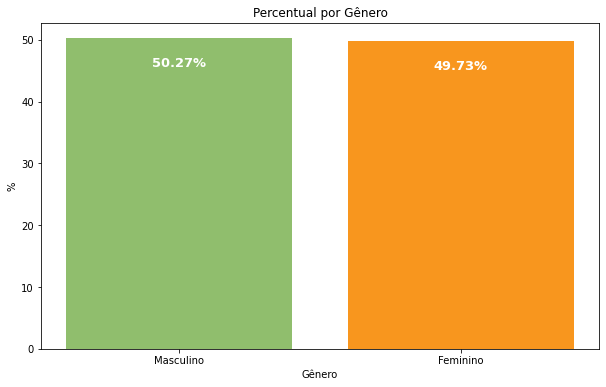

In [32]:
#### Contabilizando os valores que serão plotados no gráfico ###
cont = df['Genero'].value_counts()
total = cont.sum()
porcentagens = (cont / total) * 100

### Ajustes de cores e tamanho do gráfico ###
cores_personalizadas = ['#90BE6D', '#F8961E']
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(cont.index, porcentagens.values, color=cores_personalizadas)

### Ajustes de design do rótulo das colunas do grafico ###
for bar, percentage in zip(bars, porcentagens):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 0.90,
        f'{percentage:.2f}%',
        ha='center',
        va='bottom',
        fontsize=13,
        color='white',
        fontweight='bold')

### Edição de titulos e labels do gráfico ###
plt.title('Percentual por Gênero')
plt.xlabel('Gênero')
plt.ylabel('%')
ax.grid(visible=False)

### Comando para exibição do gráfico ###
plt.show()

In [33]:
df_default = df.loc[0:,['Genero','Idade']] ### Separando as colunas que serão utilizadas 

faixa_etaria_bins = [0,18, 20, 25, 30, 35, 40,45, 50,55, 60,65, 70,75,80, 100] ### Definindo agrupamentos das idades
faixa_etaria_labels = ['Menos de 18', '18-20', '21-25','26-30', '31-35', '36-40', '41-45',
                       '46-50', '51-55', '56-60', '61-65','66-70','71-75','76-80', 'Mais de 80']

df_default['Faixa Etária'] = pd.cut(df_default['Idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)

### Contabilizando as quantidades em colunas separadas
result = df_default.groupby(['Faixa Etária', 'Genero']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)

result

,Faixa Etária,Feminino,Masculino
0,Menos de 18,0,0
1,18-20,124,106
2,21-25,319,302
3,26-30,280,293
4,31-35,290,292
5,36-40,276,320
6,41-45,313,291
7,46-50,301,310
8,51-55,288,299
9,56-60,296,290


In [34]:
cores_paleta = ['#F94144','#F3722C','#F8961E','#F9844A','#F9C74F',
                '#90BE6D','#43AA8B','#4D908E','#577590','#277DA1']

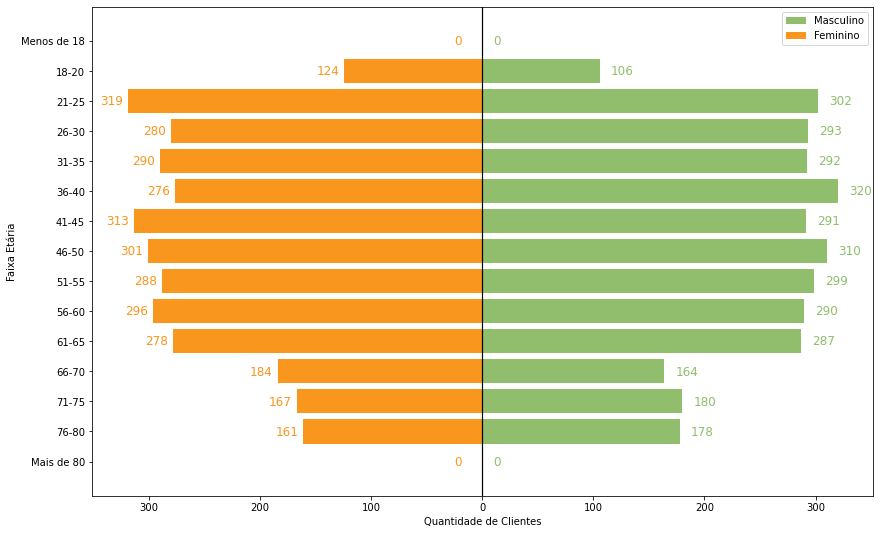

In [35]:
fig, ax = plt.subplots(figsize=(14, 9)) 
ax.barh(result['Faixa Etária'], result['Masculino'], color='#90BE6D', label='Masculino')
ax.barh(result['Faixa Etária'], [-x for x in result['Feminino']], color='#F8961E', label='Feminino')

### Atribuindo linha vertical no meio
ax.axvline(0, color='black', linewidth=1.2)

### Rótulo dos eixos
ax.set_xlabel('Quantidade de Clientes')
ax.set_ylabel('Faixa Etária')

ax.legend() ### Adicionando uma legenta
ax.invert_yaxis() ### Invertendo a ordem do eixo y para as idades mais jovens aparecerem em cima

for i in range(len(result['Faixa Etária'])): ### Ajuste dos rótulos das colunas
    ax.text(result['Masculino'][i] + 10, i, str(result['Masculino'][i]), va='center', fontsize=12, color='#90BE6D')
    ax.text(-result['Feminino'][i] - 25, i, str(result['Feminino'][i]), va='center', fontsize=12, color='#F8961E')
    
custom_ticks = [-300, -200, -100, 0, 100, 200, 300 ]
custom_labels = [abs(i) for i in custom_ticks]  ### Ajuste para que os valores fiquem postivos
plt.xticks(custom_ticks, custom_labels)
ax.grid(visible=False)
plt.show()

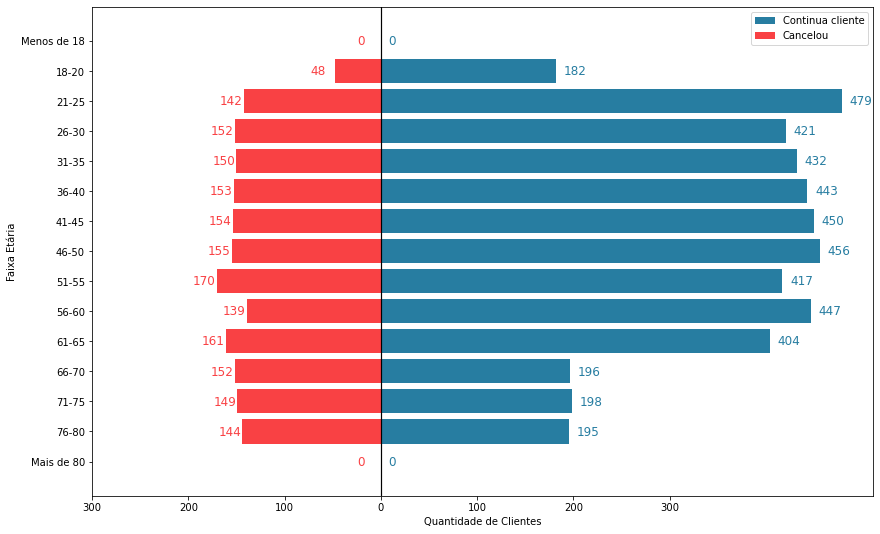

In [36]:
df_default = df.loc[0:,['Situacao_cliente','Idade']]
df_default['Faixa Etária'] = pd.cut(df_default['Idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)
result = df_default.groupby(['Faixa Etária', 'Situacao_cliente']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)
fig, ax = plt.subplots(figsize=(14, 9))
ax.barh(result['Faixa Etária'], result['Continua cliente'], color='#277DA1', label='Continua cliente')
ax.barh(result['Faixa Etária'], [-x for x in result['Cancelou']], color='#F94144', label='Cancelou')
ax.axvline(0, color='black', linewidth=1.2)
ax.set_xlabel('Quantidade de Clientes')
ax.set_ylabel('Faixa Etária')
ax.legend()
ax.invert_yaxis()

for i in range(len(result['Faixa Etária'])):    
    ax.text(result['Continua cliente'][i] + 8, i, str(result['Continua cliente'][i]),
            va='center', fontsize=12, color='#277DA1')
    ax.text(-result['Cancelou'][i] - 25, i, str(result['Cancelou'][i]),
            va='center', fontsize=12, color='#F94144')

custom_ticks = [-300, -200, -100, 0, 100, 200, 300 ]
custom_labels = [abs(i) for i in custom_ticks]  ### Ajustando para que os valores fiquem positivos nos rótulos

plt.xticks(custom_ticks, custom_labels)
ax.grid(visible=False)
plt.show()

In [37]:
1869/(1869+4720)

0.2836545758081651

In [38]:
clientes_cancelados = df[df['Situacao_cliente']=='Cancelou']['Situacao_cliente'].count()
clientes_retidos = df[df['Situacao_cliente']=='Continua cliente']['Situacao_cliente'].count()
val_med = clientes_cancelados/(clientes_cancelados+clientes_retidos)
val_med

0.2836545758081651

In [39]:
df_rel = result[['Cancelou','Continua cliente']]

df_rel['proporcional'] = df_rel['Cancelou']/(df_rel['Cancelou']+df_rel['Continua cliente'])
df_rel['proporcional'] = df_rel['proporcional'].fillna(0)
df_rel['Faixa Etária'] = result['Faixa Etária']

faixas_vazias = ['Menos de 18','Mais de 80']
df_rel = df_rel[~df_rel['Faixa Etária'].isin(faixas_vazias)]### Retirando faixas etarias que não possuem clientes

df_rel

,Cancelou,Continua cliente,proporcional,Faixa Etária
1,48,182,0.208696,18-20
2,142,479,0.228663,21-25
3,152,421,0.265271,26-30
4,150,432,0.257732,31-35
5,153,443,0.256711,36-40
6,154,450,0.254967,41-45
7,155,456,0.253682,46-50
8,170,417,0.289608,51-55
9,139,447,0.237201,56-60
10,161,404,0.284956,61-65


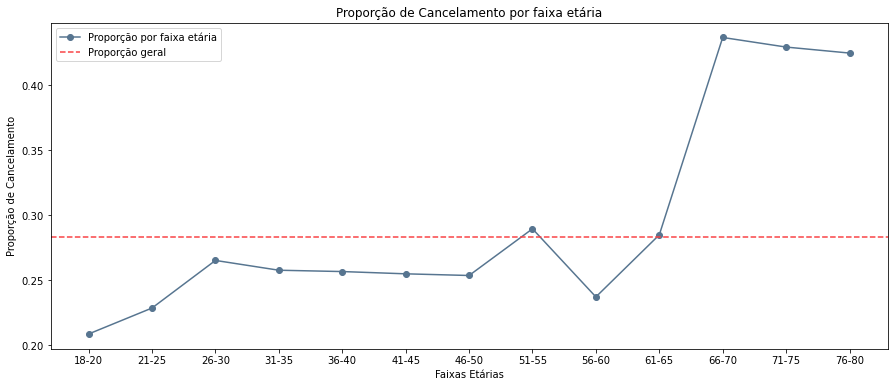

In [40]:

plt.figure(figsize=(15, 6))
plt.plot(df_rel['Faixa Etária'], df_rel['proporcional'],
         label='Proporção por faixa etária', marker='o', linestyle='-', color='#577590')
plt.axhline(y=val_med, color='#F94144', linestyle='--', label='Proporção geral')

plt.xlabel('Faixas Etárias')
plt.ylabel('Proporção de Cancelamento')
plt.title('Proporção de Cancelamento por faixa etária')

plt.legend()

plt.grid(visible=False)
plt.show()

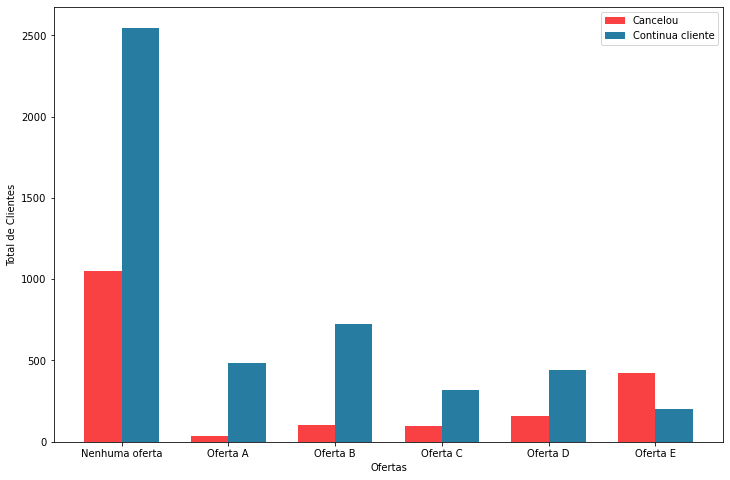

In [41]:
df_default = df.loc[0:,['Situacao_cliente','Ultima_oferta']]
result = df_default.groupby(['Ultima_oferta', 'Situacao_cliente']).size().unstack(fill_value=0)
result = result.reset_index()

lrg_bar = 0.35
índices = range(len(result['Ultima_oferta']))
plt.figure(figsize=(12, 8))
plt.bar([i - lrg_bar/2 for i in índices], result['Cancelou'], lrg_bar, color='#F94144',label='Cancelou')
plt.bar([i + lrg_bar/2 for i in índices], result['Continua cliente'], lrg_bar, color='#277DA1',label='Continua cliente')

plt.xticks(índices, result['Ultima_oferta'])
plt.legend()
plt.ylabel('Total de Clientes')
plt.xlabel('Ofertas')
plt.show()

In [42]:
df_default = df.loc[0:,['Ultima_oferta','Situacao_cliente','Idade']]
df_default['Faixa Etária'] = pd.cut(df_default['Idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)

result = df_default.groupby(['Ultima_oferta','Faixa Etária', 'Situacao_cliente']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)

faixas_vazias = ['Menos de 18','Mais de 80']
result = result[~result['Faixa Etária'].isin(faixas_vazias)] ### Removendo faixas etarias sem clientes
result = result[result['Ultima_oferta']!='Nenhuma oferta'] ### Removendo clientes que nao receberam ofertas

result['% clientes que permaneceram'] = result['Continua cliente']/(result['Continua cliente']+result['Cancelou'])*100
result

,Ultima_oferta,Faixa Etária,Cancelou,Continua cliente,% clientes que permaneceram
16,Oferta A,18-20,0,18,100.000000
17,Oferta A,21-25,6,61,91.044776
18,Oferta A,26-30,6,42,87.500000
19,Oferta A,31-35,3,37,92.500000
20,Oferta A,36-40,1,46,97.872340
...,...,...,...,...,...
84,Oferta E,56-60,34,13,27.659574
85,Oferta E,61-65,47,15,24.193548
86,Oferta E,66-70,20,13,39.393939
87,Oferta E,71-75,27,4,12.903226


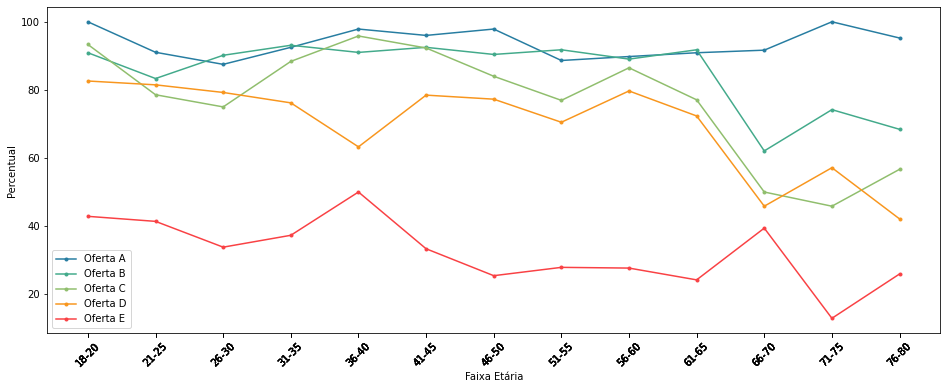

In [43]:
plt.figure(figsize=(16, 6))
cores_paleta = ['#277DA1','#43AA8B','#90BE6D','#F8961E','#F94144']
categorias_unicas = result['Ultima_oferta'].unique()

for i, (categoria) in enumerate(categorias_unicas):
    cor = cores_paleta[i % len(cores_paleta)]
    dados_categoria = result[result['Ultima_oferta'] == categoria]
    
    plt.plot(dados_categoria['Faixa Etária'], dados_categoria['% clientes que permaneceram'],
             label=categoria,marker='.',color=cor)

plt.xlabel('Faixa Etária')
plt.ylabel('Percentual')
plt.legend()
plt.xticks(result['Faixa Etária'], rotation=45)
plt.grid(False)
plt.show()

## situação do cliente  vs tempo de empresa

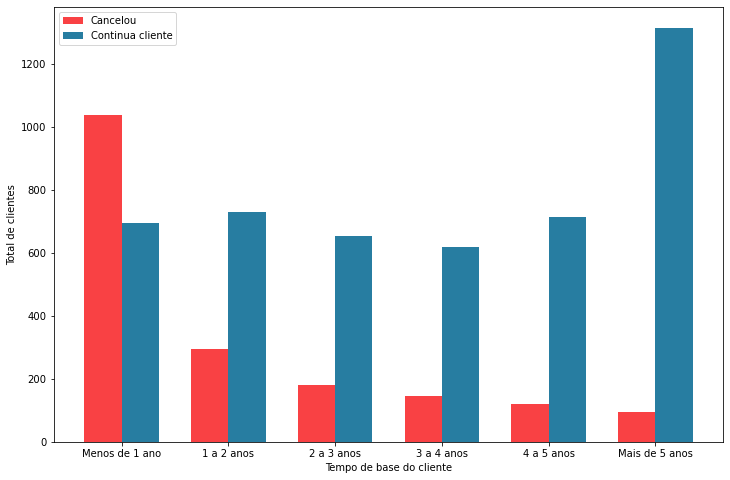

In [44]:
df_default = df.loc[0:,['Situacao_cliente','Meses_na_base']]
faixa_tempo_de_base = [0,12, 24, 36, 48, 60,1000]
faixa_tempo_labels = ['Menos de 1 ano', '1 a 2 anos', '2 a 3 anos','3 a 4 anos', '4 a 5 anos','Mais de 5 anos']
df_default['Faixa_tempo_base'] = pd.cut(df_default['Meses_na_base'], bins=faixa_tempo_de_base, labels=faixa_tempo_labels)
result = df_default.groupby(['Faixa_tempo_base', 'Situacao_cliente']).size().unstack().reset_index()
result = result.reset_index(drop=True)
tam_bar = 0.35
índices = range(len(result['Faixa_tempo_base']))
plt.figure(figsize=(12, 8))
plt.bar([i - tam_bar/2 for i in índices], result['Cancelou'], tam_bar, label='Cancelou',color='#F94144')
plt.bar([i + tam_bar/2 for i in índices], result['Continua cliente'], tam_bar, label='Continua cliente',color='#277DA1')
plt.xticks(índices, result['Faixa_tempo_base'])
plt.ylabel('Total de clientes')
plt.xlabel('Tempo de base do cliente')
plt.legend()
plt.show()

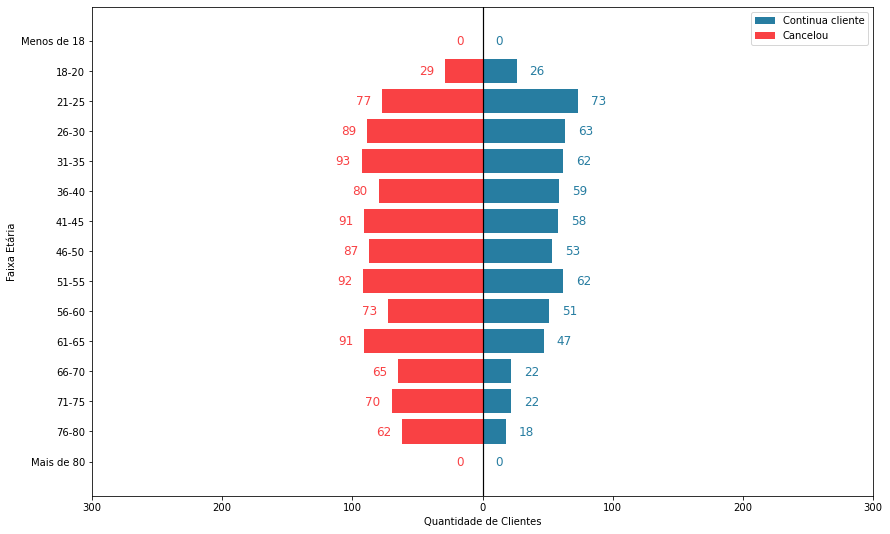

In [45]:
df_default = df[df['Meses_na_base']<12].loc[0:,['Situacao_cliente','Idade']]
df_default['Faixa Etária'] = pd.cut(df_default['Idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)
result = df_default.groupby(['Faixa Etária', 'Situacao_cliente']).size().unstack().reset_index()
result = result.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 9))
ax.barh(result['Faixa Etária'], result['Continua cliente'], color='#277DA1', label='Continua cliente')
ax.barh(result['Faixa Etária'], [-x for x in result['Cancelou']], color='#F94144', label='Cancelou')
ax.axvline(0, color='black', linewidth=1.2)
ax.set_xlabel('Quantidade de Clientes')
ax.set_ylabel('Faixa Etária')
ax.legend()
ax.invert_yaxis()

for i in range(len(result['Faixa Etária'])):    
    ax.text(result['Continua cliente'][i] + 10, i, str(result['Continua cliente'][i]),
            va='center', fontsize=12, color='#277DA1')
    ax.text(-result['Cancelou'][i] - 20, i, str(result['Cancelou'][i]),
            va='center', fontsize=12, color='#F94144')
    
custom_ticks = [-300, -200, -100, 0, 100, 200, 300 ]
custom_labels = [abs(i) for i in custom_ticks]
plt.xticks(custom_ticks, custom_labels)
ax.grid(visible=False)
plt.show()

In [46]:
df_default = df.loc[0:,['Cidade','Codigo_postal','Populacao']]
df_cid = df_default.drop_duplicates(
    subset=['Cidade', 'Codigo_postal'])[['Cidade', 'Populacao']].groupby('Cidade').sum().reset_index()

df_cid = df_cid.sort_values('Populacao',ascending=False)
df = df.drop(['Codigo_postal','Populacao'], axis=1)
df = pd.merge(df, df_cid,left_on=['Cidade'],right_on=['Cidade'],how='left')
colunas = df.columns.tolist()
colunas.insert(5, colunas.pop(colunas.index('Populacao')))
df = df[colunas]

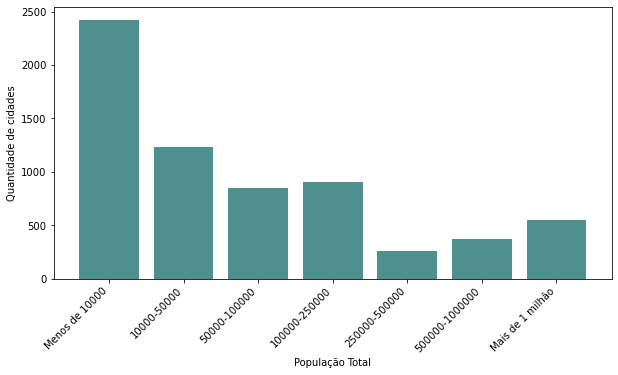

In [47]:
df_default = df.loc[0:,['Cidade','Populacao']]
faixa_populacional = [0,10000, 50000, 100000, 250000, 500000,1000000,10000000000]
faixa_populacional_labels = ['Menos de 10000', '10000-50000', '50000-100000',
                             '100000-250000', '250000-500000', '500000-1000000','Mais de 1 milhão']
df_default['Faixa Populacional'] = pd.cut(df_default['Populacao'], bins=faixa_populacional, labels=faixa_populacional_labels)
result = df_default.groupby(['Faixa Populacional']).count().reset_index()
result = result.rename_axis(None, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(result['Faixa Populacional'], result['Populacao'], color='#4D908E')
plt.ylabel('Quantidade de cidades')
plt.xlabel('População Total')
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,6024,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,Permaneceu cliente,Permaneceu cliente
1,Masculino,46,Não,0,Glendale,176940,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,Permaneceu cliente,Permaneceu cliente
2,Masculino,50,Não,0,Costa Mesa,110276,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,67798,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Feminino,36,Não,0,Fallbrook,42239,33.362575,-117.299644,0,4,Nenhuma oferta,Sim,2.01,Não,Não,Não,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Mensal,Não,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,Cancelou,Concorrente,Concorrente fez uma oferta melhor
6585,Feminino,20,Não,0,La Mesa,68657,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,Permaneceu cliente,Permaneceu cliente
6586,Masculino,40,Sim,0,Riverbank,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
6587,Masculino,21,Sim,0,Solana Beach,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,Permaneceu cliente,Permaneceu cliente


In [49]:
def geraGraf(coluna,val_ini_y):
    df_default = df.loc[0:,['Cidade','Populacao',coluna]]
    faixa_populacional = [0,10000, 50000, 100000, 250000, 500000,1000000,10000000000]
    faixa_populacional_labels = ['Menos de 10000', '10000-50000', '50000-100000',
                             '100000-250000', '250000-500000', '500000-1000000','Mais de 1 milhão']
    df_default['Faixa Populacional'] = pd.cut(df_default['Populacao'],
                                              bins=faixa_populacional, labels=faixa_populacional_labels)
    result = df_default.groupby(['Faixa Populacional'])[coluna].mean().reset_index()
    result = result.rename_axis(None, axis=1)
    plt.figure(figsize=(10, 5))
    plt.plot(result['Faixa Populacional'], result[coluna], color='#F3722C', marker='o')
    plt.fill_between(result['Faixa Populacional'], result[coluna], color='#577590', alpha=0.5)
    plt.ylim(bottom=val_ini_y)  ### Definindo o valor inicial do eixo Y
    plt.ylabel(coluna)
    plt.xlabel('População')
    plt.xticks(rotation=45, ha='right')
    plt.show()

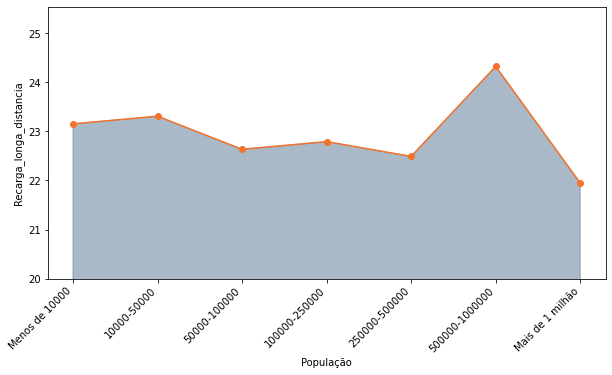

In [50]:
geraGraf('Recarga_longa_distancia',20)

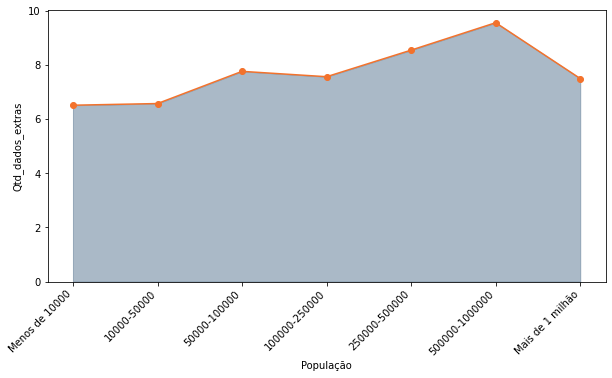

In [51]:
geraGraf('Qtd_dados_extras',0)

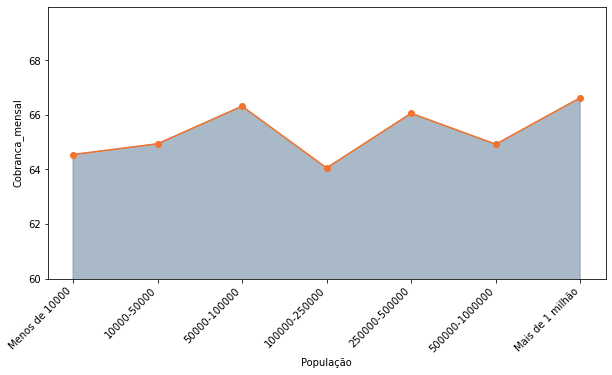

In [52]:
geraGraf('Cobranca_mensal',60)

In [53]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,6024,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,Permaneceu cliente,Permaneceu cliente
1,Masculino,46,Não,0,Glendale,176940,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,Permaneceu cliente,Permaneceu cliente
2,Masculino,50,Não,0,Costa Mesa,110276,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,67798,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Feminino,36,Não,0,Fallbrook,42239,33.362575,-117.299644,0,4,Nenhuma oferta,Sim,2.01,Não,Não,Não,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Mensal,Não,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,Cancelou,Concorrente,Concorrente fez uma oferta melhor
6585,Feminino,20,Não,0,La Mesa,68657,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,Permaneceu cliente,Permaneceu cliente
6586,Masculino,40,Sim,0,Riverbank,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
6587,Masculino,21,Sim,0,Solana Beach,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,Permaneceu cliente,Permaneceu cliente


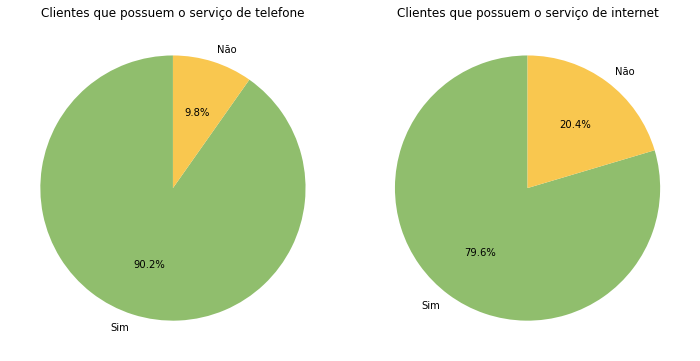

In [54]:
qtd_telefone = df['Servico_telefone'].value_counts()
qtd_internet = df['Servico_internet'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].pie(qtd_telefone, labels=qtd_telefone.index, autopct='%1.1f%%', startangle=90, colors=['#90BE6D','#F9C74F'])
axes[0].set_title('Clientes que possuem o serviço de telefone')
axes[1].pie(qtd_internet, labels=qtd_internet.index, autopct='%1.1f%%', startangle=90, colors=['#90BE6D','#F9C74F'])
axes[1].set_title('Clientes que possuem o serviço de internet')
plt.tight_layout()
plt.show()

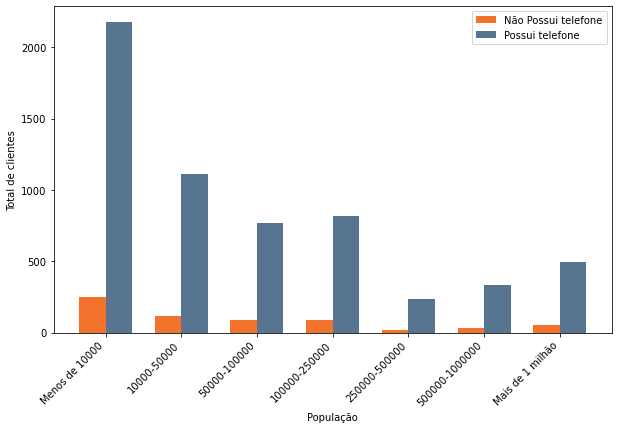

In [55]:
df_default = df.loc[0:,['Cidade','Populacao','Servico_telefone']]
faixa_populacional = [0,10000, 50000, 100000, 250000, 500000,1000000,10000000000]
faixa_populacional_labels = ['Menos de 10000', '10000-50000', '50000-100000',
                             '100000-250000', '250000-500000', '500000-1000000','Mais de 1 milhão']
df_default['Faixa Populacional'] = pd.cut(df_default['Populacao'],
                                          bins=faixa_populacional, labels=faixa_populacional_labels)
result = df_default.groupby(['Faixa Populacional', 'Servico_telefone']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)
índices = range(len(result['Faixa Populacional']))
plt.figure(figsize=(10, 6))
plt.bar([i - tam_bar/2 for i in índices], result['Não'], tam_bar, label='Não Possui telefone',color='#F3722C')
plt.bar([i + tam_bar/2 for i in índices], result['Sim'], tam_bar, label='Possui telefone',color='#577590')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('Total de clientes')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

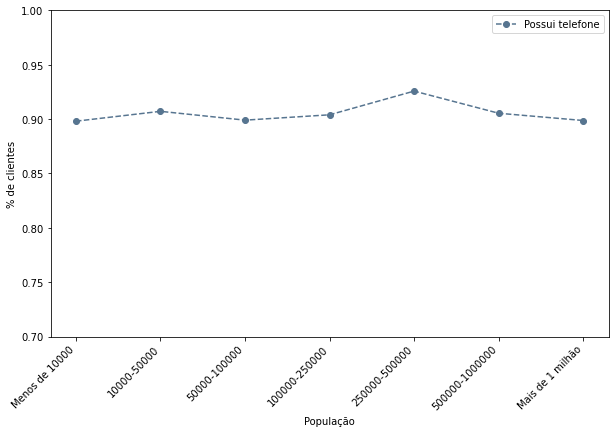

In [56]:
result['proporção'] = result['Sim']/(result['Sim']+result['Não'])
plt.figure(figsize=(10, 6))
plt.plot(result['Faixa Populacional'], result['proporção'], label='Possui telefone', marker='o',linestyle='--',color='#577590')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('% de clientes')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0.7,top=1)
plt.legend()
plt.show()

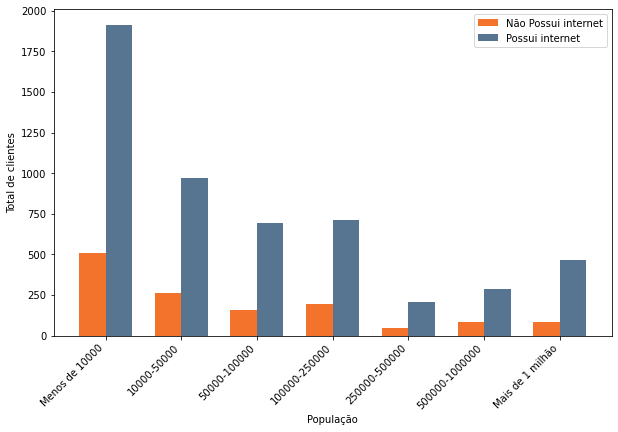

In [57]:
df_default = df.loc[0:,['Cidade','Populacao','Servico_internet']]
faixa_populacional = [0,10000, 50000, 100000, 250000, 500000,1000000,10000000000]
faixa_populacional_labels = ['Menos de 10000', '10000-50000', '50000-100000',
                             '100000-250000', '250000-500000', '500000-1000000','Mais de 1 milhão']
df_default['Faixa Populacional'] = pd.cut(df_default['Populacao'],
                                          bins=faixa_populacional, labels=faixa_populacional_labels)
result = df_default.groupby(['Faixa Populacional', 'Servico_internet']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)

índices = range(len(result['Faixa Populacional']))
plt.figure(figsize=(10, 6))
plt.bar([i - tam_bar/2 for i in índices], result['Não'], tam_bar, label='Não Possui internet',color='#F3722C')
plt.bar([i + tam_bar/2 for i in índices], result['Sim'], tam_bar, label='Possui internet',color='#577590')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('Total de clientes')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

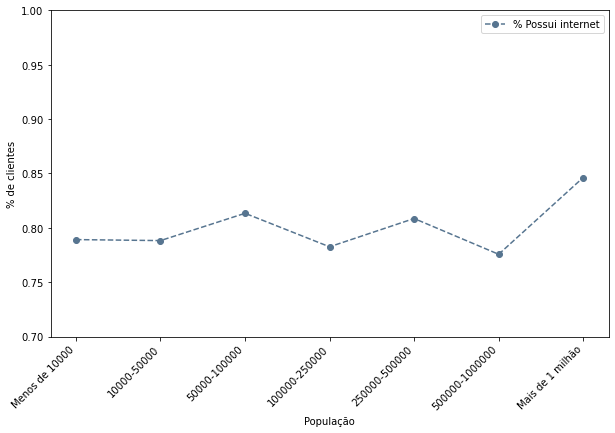

In [58]:
result['proporção'] = result['Sim']/(result['Sim']+result['Não'])
plt.figure(figsize=(10, 6))
plt.plot(result['Faixa Populacional'], result['proporção'], label='% Possui internet',marker='o',linestyle='--',color='#577590')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('% de clientes')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0.7,top=1)
plt.legend()
plt.show()

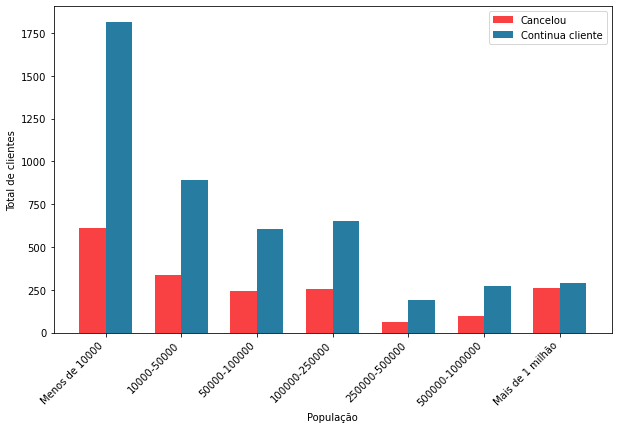

In [59]:
df_default = df.loc[0:,['Cidade','Populacao','Situacao_cliente']]
faixa_populacional = [0,10000, 50000, 100000, 250000, 500000,1000000,10000000000]
faixa_populacional_labels = ['Menos de 10000', '10000-50000', '50000-100000',
                             '100000-250000', '250000-500000', '500000-1000000','Mais de 1 milhão']
df_default['Faixa Populacional'] = pd.cut(df_default['Populacao'],
                                          bins=faixa_populacional, labels=faixa_populacional_labels)
result = df_default.groupby(['Faixa Populacional', 'Situacao_cliente']).size().unstack().reset_index()
result = result.rename_axis(None, axis=1)

índices = range(len(result['Faixa Populacional']))
plt.figure(figsize=(10, 6))
plt.bar([i - tam_bar/2 for i in índices], result['Cancelou'], tam_bar, label='Cancelou',color='#F94144')
plt.bar([i + tam_bar/2 for i in índices], result['Continua cliente'], tam_bar, label='Continua cliente',color='#277DA1')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('Total de clientes')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

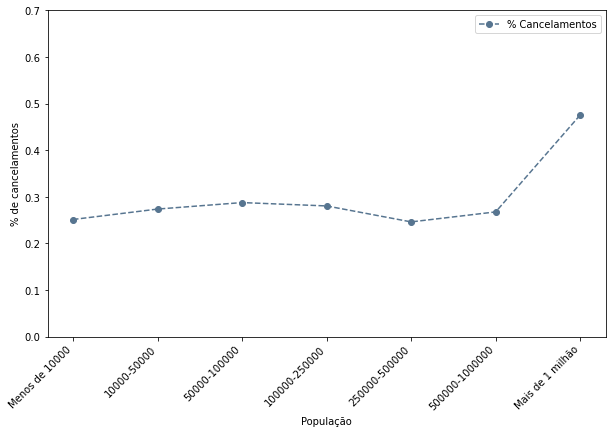

In [60]:
result['proporção'] = result['Cancelou']/(result['Cancelou']+result['Continua cliente'])
plt.figure(figsize=(10, 6))
plt.plot(result['Faixa Populacional'], result['proporção'], label='% Cancelamentos',marker='o',linestyle='--',color='#577590')
plt.xticks(índices, result['Faixa Populacional'])
plt.ylabel('% de cancelamentos')
plt.xlabel('População')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0,top=0.7)
plt.legend()
plt.show()

In [61]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,6024,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,Permaneceu cliente,Permaneceu cliente
1,Masculino,46,Não,0,Glendale,176940,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,Permaneceu cliente,Permaneceu cliente
2,Masculino,50,Não,0,Costa Mesa,110276,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,67798,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Feminino,36,Não,0,Fallbrook,42239,33.362575,-117.299644,0,4,Nenhuma oferta,Sim,2.01,Não,Não,Não,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Mensal,Não,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,Cancelou,Concorrente,Concorrente fez uma oferta melhor
6585,Feminino,20,Não,0,La Mesa,68657,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,Permaneceu cliente,Permaneceu cliente
6586,Masculino,40,Sim,0,Riverbank,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
6587,Masculino,21,Sim,0,Solana Beach,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,Permaneceu cliente,Permaneceu cliente


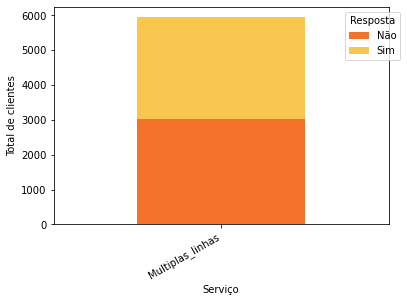

In [62]:
df_default = df[df['Servico_telefone']=="Sim"].loc[0:,['Multiplas_linhas']]

counts = df_default.apply(pd.Series.value_counts)
counts.T.plot(kind='bar', stacked=True, color=['#F3722C','#F9C74F'])
plt.xlabel('Serviço')
plt.ylabel('Total de clientes')
plt.legend(title='Resposta', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=30,ha='right')
plt.show()

In [63]:
lista_colunas = ['Multiplas_linhas']

result = pd.DataFrame()
res = pd.DataFrame()

for item in lista_colunas:
    df_default = df[df['Servico_telefone']=="Sim"].loc[0:,['Servico_telefone','Multiplas_linhas','Situacao_cliente']]
    df_default = pd.DataFrame(df_default.groupby([item,'Situacao_cliente'])['Servico_telefone'].count().reset_index())
    res = df_default.groupby([item,'Situacao_cliente'])['Servico_telefone'].sum().unstack().reset_index()
    res = res.rename_axis(None, axis=1)
    res['serviço'] = item
    res = res.rename(columns={item:'possui'},inplace=False)
    result = result.append(res,ignore_index=True)
    
result['proporcao'] = result['Continua cliente']/(result['Cancelou']+result['Continua cliente'])
result = result.groupby(['serviço','possui'])['proporcao'].sum().unstack().reset_index()

result = result.rename_axis(None, axis=1)

result



,serviço,Não,Sim
0,Multiplas_linhas,0.718781,0.709501


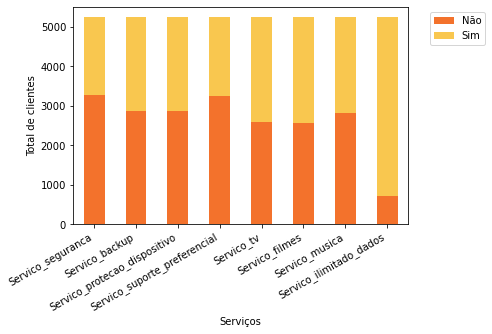

In [64]:
df_default = df[df['Servico_internet']=="Sim"].loc[0:,['Servico_seguranca','Servico_backup',
                                                       'Servico_protecao_dispositivo',
                                                       'Servico_suporte_preferencial',
                                                       'Servico_tv','Servico_filmes',
                                                       'Servico_musica','Servico_ilimitado_dados']]
counts = df_default.apply(pd.Series.value_counts)
counts.T.plot(kind='bar', stacked=True, color=['#F3722C','#F9C74F'])
plt.xlabel('Serviços')
plt.ylabel('Total de clientes')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=30,ha='right')
plt.show()

In [65]:
lista_colunas = ['Servico_seguranca','Servico_backup','Servico_protecao_dispositivo','Servico_suporte_preferencial',
                 'Servico_tv','Servico_filmes','Servico_musica','Servico_ilimitado_dados']
result = pd.DataFrame()
res = pd.DataFrame()
for item in lista_colunas:
    df_default = df[df['Servico_internet']=="Sim"].loc[0:,['Servico_internet','Servico_seguranca','Servico_backup',
                                                           'Servico_protecao_dispositivo','Servico_suporte_preferencial',
                                                           'Servico_tv','Servico_filmes','Servico_musica',
                                                           'Servico_ilimitado_dados','Situacao_cliente']]
    df_default = df_default.groupby([item,'Situacao_cliente'])['Servico_internet'].count().reset_index()
    res = df_default.groupby([item,'Situacao_cliente'])['Servico_internet'].sum().unstack().reset_index()
    res = res.rename_axis(None, axis=1)
    res['serviço'] = item
    res = res.rename(columns={item:'possui'},inplace=False)
    result = result.append(res,ignore_index=True)
    
result['proporcao'] = result['Continua cliente']/(result['Cancelou']+result['Continua cliente'])
result = result.groupby(['serviço','possui'])['proporcao'].sum().unstack().reset_index()
result = result.rename_axis(None, axis=1)
result['Não'] = result['Não'] * 100
result['Sim'] = result['Sim'] * 100
display(result)

,serviço,Não,Sim
0,Servico_backup,57.038328,77.978947
1,Servico_filmes,63.387978,69.511741
2,Servico_ilimitado_dados,64.917127,66.777262
3,Servico_musica,63.403346,70.114943
4,Servico_protecao_dispositivo,57.583187,77.196653
5,Servico_seguranca,55.348411,85.048150
6,Servico_suporte_preferencial,55.480296,84.476715
7,Servico_tv,63.587167,69.375470


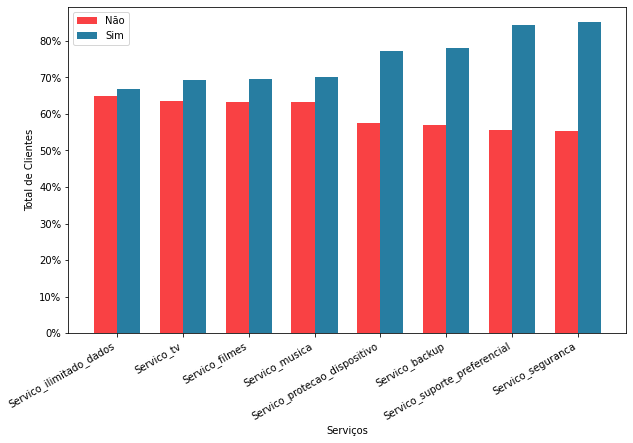

In [66]:
lrg_bar = 0.35
result = result.sort_values(by=['Sim', 'Não'])
indices = range(len(result['serviço']))
plt.figure(figsize=(10, 6))
plt.bar([i - lrg_bar/2 for i in indices], result['Não'], lrg_bar, color='#F94144',label='Não')
plt.bar([i + lrg_bar/2 for i in indices], result['Sim'], lrg_bar, color='#277DA1',label='Sim')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(indices, result['serviço'])
plt.legend()
plt.ylabel('Total de Clientes')
plt.xlabel('Serviços')
plt.xticks(rotation=30,ha='right')

plt.show()

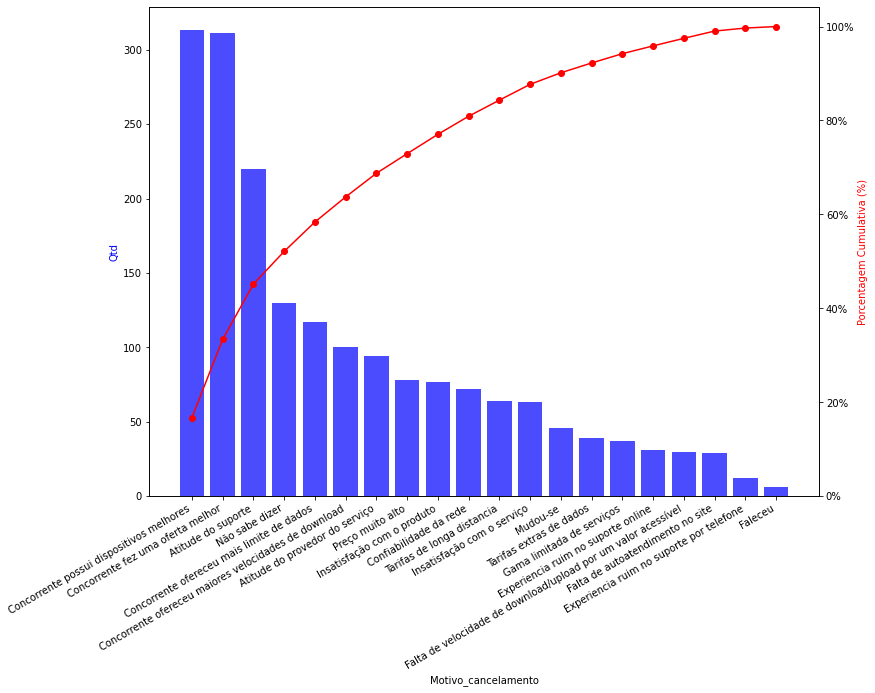

In [67]:
df_default = df.loc[0:,['Ultima_oferta','Categoria_cancelamento','Motivo_cancelamento']]
df_default = df_default[df_default['Categoria_cancelamento']!='Permaneceu cliente']
df_default = pd.DataFrame(df_default.groupby(['Categoria_cancelamento',
                                              'Motivo_cancelamento'])['Ultima_oferta'].count().reset_index())
df_default = df_default.rename(columns={'Ultima_oferta':'Qtd'},inplace=False)
df_default = df_default.sort_values('Qtd',ascending=False)
df_default = df_default.sort_values(by='Qtd', ascending=False)
df_default['Porcentagem Cumulativa'] = 100 * df_default['Qtd'].cumsum() / df_default['Qtd'].sum()
fig, ax1 = plt.subplots(figsize=(12,9))
plt.xticks(rotation=30,ha='right')
ax1.bar(df_default['Motivo_cancelamento'], df_default['Qtd'], color='b', alpha=0.7)
ax1.set_xlabel('Motivo_cancelamento')
ax1.set_ylabel('Qtd', color='b')
ax2 = ax1.twinx()
ax2.plot(df_default['Motivo_cancelamento'], df_default['Porcentagem Cumulativa'], color='r', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa (%)', color='r')
ax2.set_ylim(0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

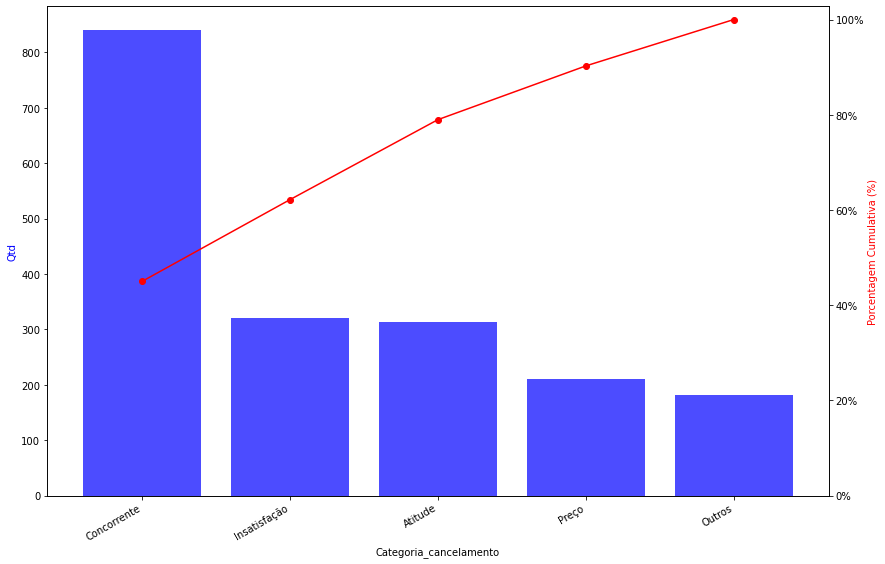

In [70]:
df_default = df.loc[0:,['Ultima_oferta','Categoria_cancelamento','Motivo_cancelamento']]
df_default = df_default[df_default['Categoria_cancelamento']!='Permaneceu cliente']
df_default = pd.DataFrame(df_default.groupby(['Categoria_cancelamento'])['Ultima_oferta'].count().reset_index())
df_default = df_default.rename(columns={'Ultima_oferta':'Qtd'},inplace=False)
df_default = df_default.sort_values('Qtd',ascending=False)
df_default = df_default.sort_values(by='Qtd', ascending=False)
df_default['Porcentagem Cumulativa'] = 100 * df_default['Qtd'].cumsum() / df_default['Qtd'].sum()
fig, ax1 = plt.subplots(figsize=(14, 9))
plt.xticks(rotation=30,ha='right')
ax1.bar(df_default['Categoria_cancelamento'], df_default['Qtd'], color='b', alpha=0.7)
ax1.set_xlabel('Categoria_cancelamento')
ax1.set_ylabel('Qtd', color='b')
ax2 = ax1.twinx()
ax2.plot(df_default['Categoria_cancelamento'], df_default['Porcentagem Cumulativa'], color='r', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa (%)', color='r')
ax2.set_ylim(0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

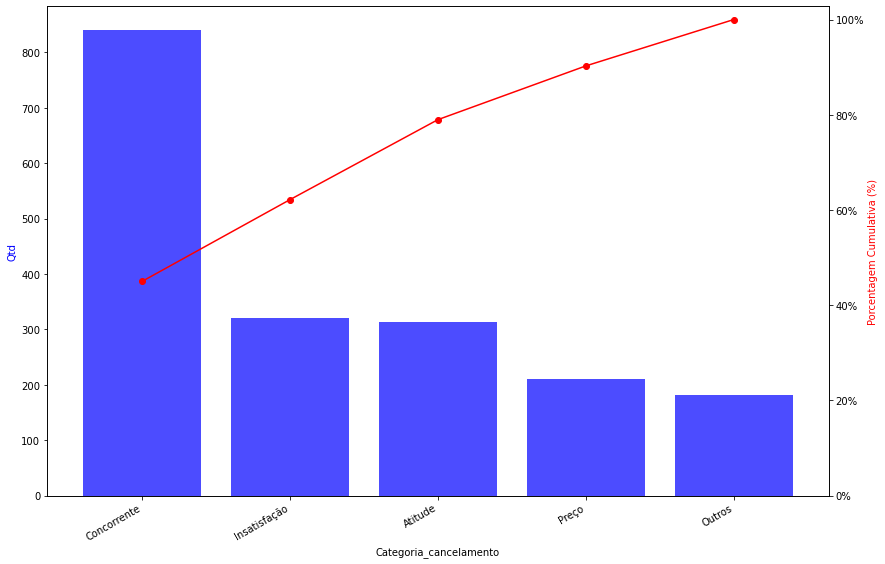

In [117]:
df_default = df[df['Idade']>10].loc[0:,['Ultima_oferta','Categoria_cancelamento','Motivo_cancelamento']]
df_default = df_default[df_default['Categoria_cancelamento']!='Permaneceu cliente']
df_default = pd.DataFrame(df_default.groupby(['Categoria_cancelamento'])['Ultima_oferta'].count().reset_index())
df_default = df_default.rename(columns={'Ultima_oferta':'Qtd'},inplace=False)
df_default = df_default.sort_values('Qtd',ascending=False)
df_default = df_default.sort_values(by='Qtd', ascending=False)
df_default['Porcentagem Cumulativa'] = 100 * df_default['Qtd'].cumsum() / df_default['Qtd'].sum()
fig, ax1 = plt.subplots(figsize=(14, 9))
plt.xticks(rotation=30,ha='right')
ax1.bar(df_default['Categoria_cancelamento'], df_default['Qtd'], color='b', alpha=0.7)
ax1.set_xlabel('Categoria_cancelamento')
ax1.set_ylabel('Qtd', color='b')
ax2 = ax1.twinx()
ax2.plot(df_default['Categoria_cancelamento'], df_default['Porcentagem Cumulativa'], color='r', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa (%)', color='r')
ax2.set_ylim(0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# =================== PAREI AQUI ==========================

In [70]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,Feminino,37,Sim,0,Frazier Park,93225,4498,34.827662,-118.999073,2,9,Nenhuma oferta,Sim,42.39,Não,Sim,Cabo,16.0,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Um ano,Sim,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,Continua cliente,Permaneceu cliente,Permaneceu cliente
1,Masculino,46,Não,0,Glendale,91206,31297,34.162515,-118.203869,0,9,Nenhuma oferta,Sim,10.69,Sim,Sim,Cabo,10.0,Não,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Não,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,Continua cliente,Permaneceu cliente,Permaneceu cliente
2,Masculino,50,Não,0,Costa Mesa,92627,62069,33.645672,-117.922613,0,4,Oferta E,Sim,33.65,Não,Sim,Fibra óptica,30.0,Não,Não,Sim,Não,Não,Não,Não,Sim,Mensal,Sim,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,Cancelou,Concorrente,Concorrente possui dispositivos melhores
3,Masculino,78,Sim,0,Martinez,94553,46677,38.014457,-122.115432,1,13,Oferta D,Sim,27.82,Não,Sim,Fibra óptica,4.0,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Mensal,Sim,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,Cancelou,Insatisfação,Insatisfação com o produto
4,Feminino,75,Sim,0,Camarillo,93010,42853,34.227846,-119.079903,3,3,Nenhuma oferta,Sim,7.38,Não,Sim,Fibra óptica,11.0,Não,Não,Não,Sim,Sim,Não,Não,Sim,Mensal,Sim,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,Cancelou,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Feminino,36,Não,0,Fallbrook,92028,42239,33.362575,-117.299644,0,4,Nenhuma oferta,Sim,2.01,Não,Não,Não,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Mensal,Não,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,Cancelou,Concorrente,Concorrente fez uma oferta melhor
6585,Feminino,20,Não,0,La Mesa,91941,44652,32.759327,-116.997260,0,13,Oferta D,Sim,46.68,Não,Sim,Cabo DSL,59.0,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Um ano,Não,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,Continua cliente,Permaneceu cliente,Permaneceu cliente
6586,Masculino,40,Sim,0,Riverbank,95367,16525,37.734971,-120.954271,1,22,Oferta D,Sim,16.20,Sim,Sim,Fibra óptica,17.0,Não,Não,Não,Não,Não,Sim,Sim,Sim,Mensal,Sim,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,Cancelou,Insatisfação,Insatisfação com o produto
6587,Masculino,21,Sim,0,Solana Beach,92075,12173,33.001813,-117.263628,5,67,Oferta A,Sim,2.12,Não,Sim,Cabo,58.0,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Dois anos,Não,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,Continua cliente,Permaneceu cliente,Permaneceu cliente


## Engenharia de recursos

In [118]:
df1 = df.replace({'Genero': {'Masculino': 1, 'Feminino': 0},
            'Casado': {'Sim': 1, 'Não': 0},
            'Servico_telefone': {'Sim': 1, 'Não': 0},
            'Servico_internet': {'Sim': 1, 'Não': 0},
            'Multiplas_linhas': {'Sim': 1, 'Não': 0},
            'Servico_seguranca': {'Sim': 1, 'Não': 0},
            'Servico_backup': {'Sim': 1, 'Não': 0},
            'Servico_protecao_dispositivo': {'Sim': 1, 'Não': 0},
            'Servico_suporte_preferencial': {'Sim': 1, 'Não': 0},
            'Servico_tv': {'Sim': 1, 'Não': 0},
            'Servico_filmes': {'Sim': 1, 'Não': 0},
            'Servico_musica': {'Sim': 1, 'Não': 0},
            'Servico_ilimitado_dados': {'Sim': 1, 'Não': 0},
            'Faturamento_sem_papel': {'Sim': 1, 'Não': 0},
            'Tipo_contrato': {'Mensal': 0, 'Um ano': 1,'Dois anos': 2},
            'Situacao_cliente': {'Continua cliente': 1, 'Cancelou': 0}})


df1 = df1.rename(columns={'Genero':'Genero_masculino'}, inplace=False)


In [119]:
df1

,Genero_masculino,Idade,Casado,Qtd_dependentes,Cidade,Populacao,Latitude,Longitude,Qtd_indicações,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,0,37,1,0,Frazier Park,6024,34.827662,-118.999073,2,9,Nenhuma oferta,1,42.39,0,1,Cabo,16.0,0,1,0,1,1,0,0,1,1,1,Cartão de credito,65.60,593.30,0.00,0,381.51,974.81,1,Permaneceu cliente,Permaneceu cliente
1,1,46,0,0,Glendale,176940,34.162515,-118.203869,0,9,Nenhuma oferta,1,10.69,1,1,Cabo,10.0,0,0,0,0,0,1,1,0,0,0,Cartão de credito,-4.00,542.40,38.33,10,96.21,610.28,1,Permaneceu cliente,Permaneceu cliente
2,1,50,0,0,Costa Mesa,110276,33.645672,-117.922613,0,4,Oferta E,1,33.65,0,1,Fibra óptica,30.0,0,0,1,0,0,0,0,1,0,1,Transferência Bancária,73.90,280.85,0.00,0,134.60,415.45,0,Concorrente,Concorrente possui dispositivos melhores
3,1,78,1,0,Martinez,46677,38.014457,-122.115432,1,13,Oferta D,1,27.82,0,1,Fibra óptica,4.0,0,1,1,0,1,1,0,1,0,1,Transferência Bancária,98.00,1237.85,0.00,0,361.66,1599.51,0,Insatisfação,Insatisfação com o produto
4,0,75,1,0,Camarillo,67798,34.227846,-119.079903,3,3,Nenhuma oferta,1,7.38,0,1,Fibra óptica,11.0,0,0,0,1,1,0,0,1,0,1,Cartão de credito,83.90,267.40,0.00,0,22.14,289.54,0,Insatisfação,Confiabilidade da rede
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,0,36,0,0,Fallbrook,42239,33.362575,-117.299644,0,4,Nenhuma oferta,1,2.01,0,0,Não,0.0,0,0,0,0,0,0,0,0,0,0,Transferência Bancária,20.95,85.50,0.00,0,8.04,93.54,0,Concorrente,Concorrente fez uma oferta melhor
6585,0,20,0,0,La Mesa,68657,32.759327,-116.997260,0,13,Oferta D,1,46.68,0,1,Cabo DSL,59.0,1,0,0,1,0,0,1,1,1,0,Cartão de credito,55.15,742.90,0.00,0,606.84,1349.74,1,Permaneceu cliente,Permaneceu cliente
6586,1,40,1,0,Riverbank,16525,37.734971,-120.954271,1,22,Oferta D,1,16.20,1,1,Fibra óptica,17.0,0,0,0,0,0,1,1,1,0,1,Transferência Bancária,85.10,1873.70,0.00,0,356.40,2230.10,0,Insatisfação,Insatisfação com o produto
6587,1,21,1,0,Solana Beach,12173,33.001813,-117.263628,5,67,Oferta A,1,2.12,0,1,Cabo,58.0,1,0,1,1,0,1,1,1,2,0,Cartão de credito,67.85,4627.65,0.00,0,142.04,4769.69,1,Permaneceu cliente,Permaneceu cliente


Text(0.5, 1.0, 'Mapa de Calor da Correlação')

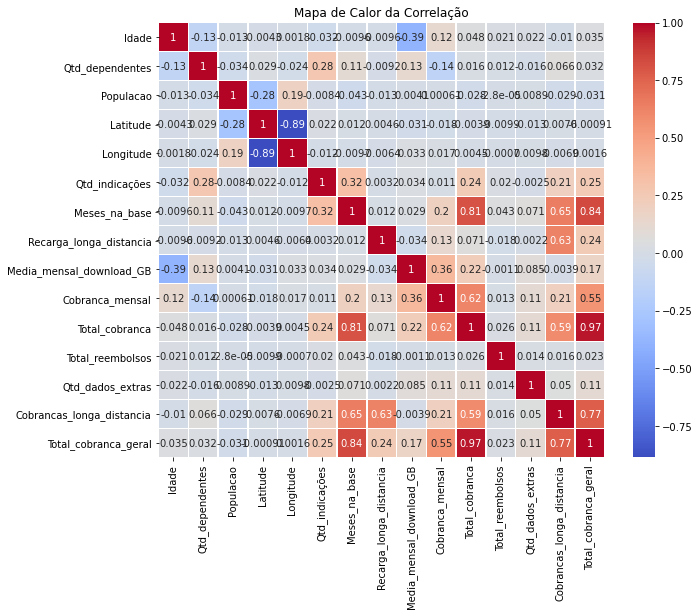

In [124]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Calor da Correlação')

Text(0.5, 1.0, 'Mapa de Calor da Correlação')

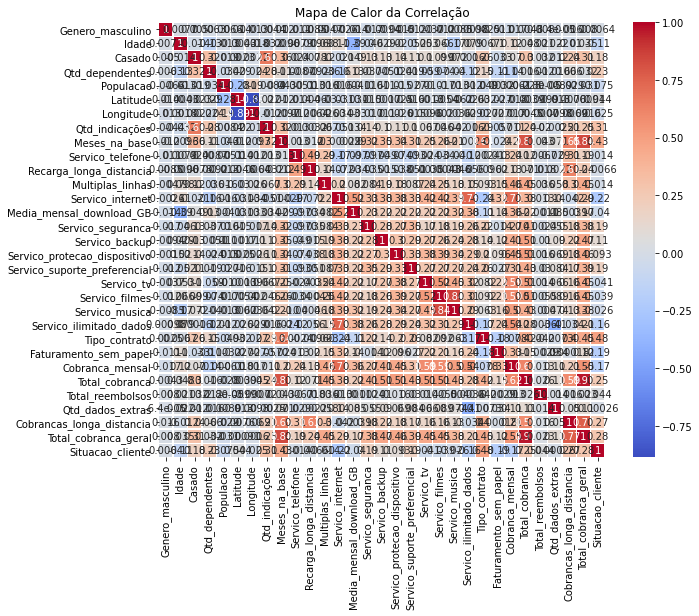

In [125]:
correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Calor da Correlação')

<AxesSubplot:>

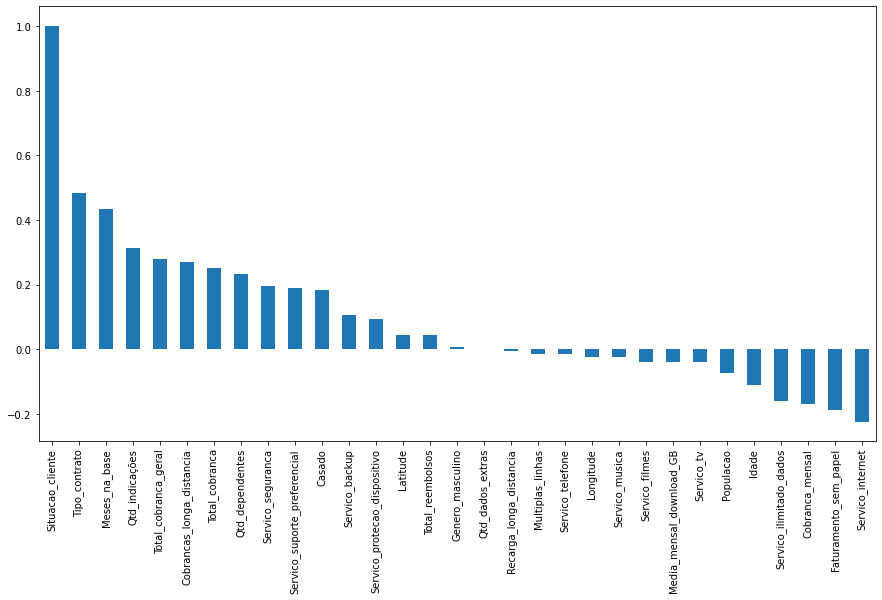

In [126]:
plt.figure(figsize=(15,8))
df1.corr()['Situacao_cliente'].sort_values(ascending = False).plot(kind='bar')

In [127]:
print(df.groupby(['Ultima_oferta'])['Ultima_oferta'].count())


Ultima_oferta
Nenhuma oferta    3598
Oferta A           520
Oferta B           824
Oferta C           415
Oferta D           602
Oferta E           630
Name: Ultima_oferta, dtype: int64


In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [129]:
def ohe(df_padrao, coluna):
    ohencoder = OneHotEncoder(handle_unknown = 'ignore')
    ohencoder = ohencoder.fit(df_padrao[[coluna]])
    colunas = ohencoder.get_feature_names_out()
    ohe_df = pd.DataFrame(ohencoder.transform(df_padrao[[coluna]]).toarray(),
                         columns = colunas,
                         dtype='int32')
    return ohe_df
    

In [130]:

df_tipoInternet = ohe(df1, 'Tipo_internet')
df_tipoPagamento = ohe(df1, 'Tipo_pagamento')
df_tipoOferta = ohe(df1, 'Ultima_oferta')


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

In [105]:
df1 = pd.concat([df1,df_tipoInternet],axis=1)
df1 = pd.concat([df1,df_tipoPagamento],axis=1)
df1 = pd.concat([df1,df_tipoOferta],axis=1)

df1 = df1.drop(['Tipo_internet','Tipo_pagamento','Ultima_oferta'], axis=1)

In [106]:
df1


,Genero_masculino,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Qtd_indicações,Meses_na_base,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Tipo_internet_Cabo,Tipo_internet_Cabo DSL,Tipo_internet_Fibra óptica,Tipo_internet_Não,Tipo_pagamento_Cartão de credito,Tipo_pagamento_Cheque enviado pelo correio,Tipo_pagamento_Transferência Bancária,Ultima_oferta_Nenhuma oferta,Ultima_oferta_Oferta A,Ultima_oferta_Oferta B,Ultima_oferta_Oferta C,Ultima_oferta_Oferta D,Ultima_oferta_Oferta E
0,0,37,1,0,Frazier Park,93225,4498,2,9,1,42.39,0,1,16.0,0,1,0,1,1,0,0,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1,1,0,0,0,1,0,0,1,0,0,0,0,0
1,1,46,0,0,Glendale,91206,31297,0,9,1,10.69,1,1,10.0,0,0,0,0,0,1,1,0,0,0,-4.00,542.40,38.33,10,96.21,610.28,1,1,0,0,0,1,0,0,1,0,0,0,0,0
2,1,50,0,0,Costa Mesa,92627,62069,0,4,1,33.65,0,1,30.0,0,0,1,0,0,0,0,1,0,1,73.90,280.85,0.00,0,134.60,415.45,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,78,1,0,Martinez,94553,46677,1,13,1,27.82,0,1,4.0,0,1,1,0,1,1,0,1,0,1,98.00,1237.85,0.00,0,361.66,1599.51,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,75,1,0,Camarillo,93010,42853,3,3,1,7.38,0,1,11.0,0,0,0,1,1,0,0,1,0,1,83.90,267.40,0.00,0,22.14,289.54,0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,0,36,0,0,Fallbrook,92028,42239,0,4,1,2.01,0,0,0.0,0,0,0,0,0,0,0,0,0,0,20.95,85.50,0.00,0,8.04,93.54,0,0,0,0,1,0,0,1,1,0,0,0,0,0
6585,0,20,0,0,La Mesa,91941,44652,0,13,1,46.68,0,1,59.0,1,0,0,1,0,0,1,1,1,0,55.15,742.90,0.00,0,606.84,1349.74,1,0,1,0,0,1,0,0,0,0,0,0,1,0
6586,1,40,1,0,Riverbank,95367,16525,1,22,1,16.20,1,1,17.0,0,0,0,0,0,1,1,1,0,1,85.10,1873.70,0.00,0,356.40,2230.10,0,0,0,1,0,0,0,1,0,0,0,0,1,0
6587,1,21,1,0,Solana Beach,92075,12173,5,67,1,2.12,0,1,58.0,1,0,1,1,0,1,1,1,2,0,67.85,4627.65,0.00,0,142.04,4769.69,1,1,0,0,0,1,0,0,0,1,0,0,0,0


In [107]:
df1.describe()

,Genero_masculino,Idade,Casado,Qtd_dependentes,Codigo_postal,Populacao,Qtd_indicações,Meses_na_base,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Cobranca_mensal,Total_cobranca,Total_reembolsos,Qtd_dados_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Tipo_internet_Cabo,Tipo_internet_Cabo DSL,Tipo_internet_Fibra óptica,Tipo_internet_Não,Tipo_pagamento_Cartão de credito,Tipo_pagamento_Cheque enviado pelo correio,Tipo_pagamento_Transferência Bancária,Ultima_oferta_Nenhuma oferta,Ultima_oferta_Oferta A,Ultima_oferta_Oferta B,Ultima_oferta_Oferta C,Ultima_oferta_Oferta D,Ultima_oferta_Oferta E
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,0.502656,46.760510,0.503567,0.476097,93491.504477,22116.481105,2.020944,34.499772,0.902261,23.004277,0.444073,0.796024,20.876461,0.299438,0.360449,0.362726,0.303081,0.403400,0.407194,0.369707,0.686144,0.796479,0.603126,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.716345,0.117469,0.233268,0.445288,0.203976,0.382152,0.052056,0.565791,0.546062,0.078919,0.125057,0.062984,0.091364,0.095614
std,0.500031,16.841362,0.500025,0.968499,1857.575392,21217.958517,3.024016,23.968734,0.296983,15.466844,0.496900,0.402982,20.406247,0.458047,0.480167,0.480823,0.459625,0.490617,0.491349,0.482762,0.464094,0.852697,0.489286,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805,0.322002,0.422943,0.497035,0.402982,0.485950,0.222158,0.495690,0.497912,0.269633,0.330809,0.242952,0.288148,0.294083
min,0.000000,19.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,92103.000000,2271.000000,0.000000,12.000000,1.000000,9.250000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,1.000000,0.000000,93526.000000,17372.000000,0.000000,32.000000,1.000000,22.920000,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,1.000000,0.000000,95333.000000,36149.000000,3.000000,57.000000,1.000000,36.440000,1.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,1.000000,9.000000,96150.000000,105285.000000,11.000000,72.000000,1.000000,49.990000,1.000000,1.000000,85.000000,1.000000,1.000000,1

In [110]:
scaler = StandardScaler()
scaler = scaler.fit(df1[['Idade']])
df1['Idade'] = scaler.transform(df1[['Idade']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Qtd_dependentes']])
df1['Qtd_dependentes'] = scaler.transform(df1[['Qtd_dependentes']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Populacao']])
df1['Populacao'] = scaler.transform(df1[['Populacao']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Qtd_indicações']])
df1['Qtd_indicações'] = scaler.transform(df1[['Qtd_indicações']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Meses_na_base']])
df1['Meses_na_base'] = scaler.transform(df1[['Meses_na_base']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Recarga_longa_distancia']])
df1['Recarga_longa_distancia'] = scaler.transform(df1[['Recarga_longa_distancia']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Media_mensal_download_GB']])
df1['Media_mensal_download_GB'] = scaler.transform(df1[['Media_mensal_download_GB']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Cobranca_mensal']])
df1['Cobranca_mensal'] = scaler.transform(df1[['Cobranca_mensal']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_cobranca']])
df1['Total_cobranca'] = scaler.transform(df1[['Total_cobranca']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_reembolsos']])
df1['Total_reembolsos'] = scaler.transform(df1[['Total_reembolsos']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Qtd_dados_extras']])
df1['Qtd_dados_extras'] = scaler.transform(df1[['Qtd_dados_extras']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Cobrancas_longa_distancia']])
df1['Cobrancas_longa_distancia'] = scaler.transform(df1[['Cobrancas_longa_distancia']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_cobranca_geral']])
df1['Total_cobranca_geral'] = scaler.transform(df1[['Total_cobranca_geral']])


# MACHINE LEARNING

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




X = df1.drop(['Situacao_cliente','Cidade','Codigo_postal'], axis=1)
y = df1['Situacao_cliente'] 


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(X_treino, y_treino)


previsoes = modelo_rf.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
print('Acurácia:', acuracia)

print(classification_report(y_teste, previsoes))

Acurácia: 0.8732928679817906
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       383
           1       0.88      0.95      0.91       935

    accuracy                           0.87      1318
   macro avg       0.87      0.82      0.84      1318
weighted avg       0.87      0.87      0.87      1318



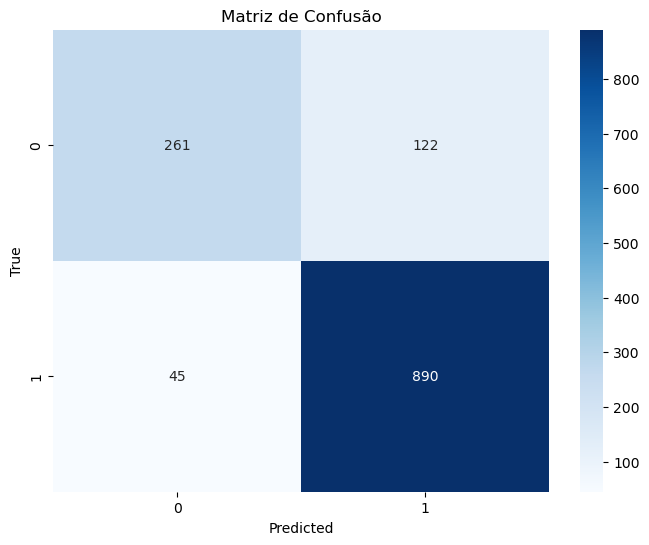

In [112]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste, previsoes)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=modelo_rf.classes_,
            yticklabels=modelo_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()